# A/B test of job descriptions using personas and LLM's


## Project description

In the evolving landscape of talent acquisition and job design, the utilization of advanced computational techniques, including Large Language Models (LLMs) and persona-based evaluation methods, represents a cutting-edge approach to optimizing job descriptions for various roles. This innovative methodology involves the creation of detailed personas, which encapsulate a wide range of candidate profiles, preferences, and competencies. These personas are then used in combinations with LLMs to assess and vote on job positions, determining which descriptions are more effective in attracting the right talent.

Mathias Schilling, 11.03.24

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import random

np.random.seed(seed = 42)
random.seed(42)

import requests
import re
import urllib.request
import openai

# Please create a file with the name "config.py" and add a single line:
# api_key = 'your_private_api_key_from_openai'
import config

from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt

## Creating personas

Let's create 100 personas of students from 5 fields of studies, machine technology, electronics engineering, data science, information technology and industrial engineering. Let's give each student a name, define which field of studies they chose and define which skills they earned during their studies. The fields of studies (`study`) and skills (`skills`), such as the professional interests (`professional_interests`) they learned are linked with each other. The learned skills fields and professional interests can further be adjusted to allow for even more diverse personas where different students learn different skills in the same fields of study.

Furthermore, each persona also obtains randomized private interestes (`private_interests`) and social skills (`social_skills`). Randomly assigning these skills, interests and traits create unique personas which in turn will take part in our A/B test.

In [2]:
names = [
    "Aarav Patel", "Mingyu Lee", "Isabella Smith", "Fatima Al-Farsi",
    "Yara Da Silva", "Jaxon Taylor", "Anya Ivanova", "Omar Al-Hakim",
    "Sofia González", "Ethan Watanabe", "Amira Al-Sayed", "Lucas Müller",
    "Nia Johnson", "Alejandro Martínez", "Tara Singh", "Mohamed Farah",
    "Chloe Dubois", "Liam O'Connor", "Kai Zhang", "Emma König",
    "Hiroshi Nakamura", "Leila Abdi", "Carlos Rivera", "Sana Iqbal",
    "Dmitri Petrov", "Amina Yusuf", "Rajesh Gupta", "Lena Schmidt",
    "Jamal Edwards", "Xiulan Zhao", "Daniel Johnson", "Maria Rodriguez",
    "Kaito Tanaka", "Olivia Brown", "Noah Levi", "Hanna Svensson",
    "Gabriela Silva", "Youssef Amr", "Sophia Li", "Ivan Smirnov",
    "Zara Patel", "Liam Wong", "Aisha Khan", "Elena García",
    "Samuel Dube", "Finn Murphy", "Grace O'Malley", "Matteo Rossi",
    "Amelia Jones", "Tariq Al-Fahim", "Victoria Petrova", "Sebastian Kim",
    "Charlotte Dubois", "Aditya Singh", "Yasmin Soares", "Aaron Zimmerman",
    "Mia Wang", "Jacob Cohen", "Isabel Costa", "Nathan Martin",
    "Sarah Müller", "Oscar Nilsson", "Julia Ivanova", "Ali Al-Hassan",
    "Emily Taylor", "Ha-yoon Kim", "Lucas Bernard", "Zoe Thomson",
    "Arthur Melo", "Nina Kuznetsova",
    "Kamau Njoroge", "Elena Petrova", "Santiago Rivera", "Aisha Al-Khalifa",
    "Dae-jung Kim", "Lerato Mokoena", "Giulia Rossi", "Hiroshi Nakamura",
    "Zara Khan", "Carlos Jimenez", "Sinead O'Reilly", "Andrei Popov",
    "Laila El-Fouly", "Raj Patel", "Noah Schwartz", "Hanna Björk",
    "Olivia Chen", "Diego Alvarez", "Priya Gupta", "Abdul Rahman Al-Sulaimi",
    "Yuki Tanaka", "Natalia Vargas", "Ibrahim El-Shamy", "Juliette Bernard",
    "Manuel Cortez", "Anika Sharma", "Bao Yu", "Caleb Mwangi", "Sophie Müller", "Alejandra Espinoza"
]

studies = ["Machine technologies",
           "Machine technologies",
           "Machine technologies",
           "Electronics engineering",
           "Electronics engineering",
           "Electronics engineering",
           "Data science", 
           "Data science",
           "Data science",
           "Information technologies", 
           "Information technologies",
           "Information technologies",
           "Industrial engineering", 
           "Industrial engineering",
           "Industrial engineering",
           ]

skills = [
    "Proficient in Maths & Physics, mechanics, fluid dynamics, thermodynamics. Knows material science for sports/medical innovations. Skilled in measurement/control tech and project-based learning.",
    "Proficient in Maths & Physics, mechanics, fluid dynamics, thermodynamics. Knows material science for sports/medical innovations. Skilled in measurement/control tech and project-based learning. Secret Skill: Expert in cryptographic techniques.",
    "Proficient in Maths & Physics, mechanics, fluid dynamics, thermodynamics. Knows material science for sports/medical innovations. Skilled in measurement/control tech and project-based learning.",
    "Mastery in microelectronics, electrical drives, wireless communications, embedded AI, and sustainable solutions.",
    "Mastery in microelectronics, electrical drives, wireless communications, embedded AI, and sustainable solutions.",
    "Mastery in microelectronics, electrical drives, wireless communications, embedded AI, and sustainable solutions.",
    "Proficient in Python/R, statistical models, machine learning, data visualization tools, and ethical data practices.",
    "Proficient in Python/R, statistical models, machine learning, data visualization tools, and ethical data practices.",
    "Proficient in Python/R, statistical models, machine learning, data visualization tools, and ethical data practices.",
    "Proficient in software dev, network infrastructures, database management, cyber security, and computing theories.",
    "Proficient in software dev, network infrastructures, database management, cyber security, and computing theories.",
    "Proficient in software dev, network infrastructures, database management, cyber security, and computing theories.",
    "Mastery in business/engineering integration, process optimization, innovative design, data analytics, and tech integration.",
    "Mastery in business/engineering integration, process optimization, innovative design, data analytics, and tech integration.",
    "Mastery in business/engineering integration, process optimization, innovative design, data analytics, and tech integration."
]

professional_interests = [
    "Eco-friendly industrial products, advanced manufacturing, medical implants, sports engineering materials, Industry 4.0 VR/AR applications.",
    "Renewable energy systems, robotics and automation in industrial settings, sustainable manufacturing practices, medical devices development, tech entrepreneurship.",
    "Sustainable energy solutions, humanitarian engineering, educational/domestic robotics, environmental conservation tech, community tech projects.",
    "Next-gen electric vehicles, digital health wearables, smart cities, quantum computing in telecom, sustainable consumer electronics entrepreneurship.",
    "Digital health innovation, sustainable transportation, smart grids, IoT for improved living, AI-enhanced manufacturing.",
    "Digital health devices, electric vehicle development, intelligent energy systems, IoT advancements, quantum computing integration.",
    "AI for climate change and healthcare, smart cities data science, agricultural big data applications, data literacy advocacy.",
    "AI in global health, sustainable energy data analytics, e-sports data platforms, data science education access, blockchain in research data integrity.",
    "AI for environmental conservation, data visualization tools, blockchain for big data, neural networks in healthcare, VR in data science education.",
    "Quantum cybersecurity, personalized learning in digital health, autonomous systems ethics, digital archaeology, sustainable computing.",
    "Quantum-AI encryption, digital health virtual ecosystem, blockchain for content creators, digital archaeology, digital empathy projects.",
    "Sustainable computing, digital archaeology tech, autonomous space exploration systems, AR for wildlife, wearable pet tech.",
    "Sustainable urban planning, space resource utilization, healthcare delivery optimization, blockchain in supply chain, AI ethics.",
    "Eco-friendly manufacturing, AI predictive maintenance, VR in industrial design, humanitarian engineering, digital transformation consultancy.",
    "Green manufacturing tech, AI ethics, space mission logistics, VR process simulation, renewable energy in industry."
]

private_interests = [
    "DIY projects, outdoor activities, volunteering, global travel, art and design inspiration.",
    "Outdoor adventures, DIY creativity, environmental volunteering, team sports, arts and crafts.",
    "Hiking, camping, crafting, travel for technology insights, sustainable cooking.",
    "Amateur astronomy, environmental conservation, fusion cooking, endurance sports, digital art.",
    "Music production, environmental advocacy, rock climbing, VR gaming, culinary fusion.",
    "Adventure sports with tech, DIY electronics, tech expos, music production, environmental activism.",
    "Diverse cuisine exploration, rock climbing, digital art with GANs, animal welfare, language learning.",
    "Ultra-marathon, animal rescue volunteering, digital art, craft beer homebrewing, tabletop RPG world-building.",
    "Astronomy with data analysis, fermentation culinary science, open-source volunteering, adventure travel, science fiction writing.",
    "Mycology for sustainability, ultra-marathon, vintage keyboard restoration, experimental music, wildlife conservation tech.",
    "Molecular gastronomy, digital urban exploration, competitive robotics, interactive digital art, conlangs for programming.",
    "Molecular cooking, ultra-marathon in extreme terrains, vintage computing, urban exploration, astronomy and astrophotography.",
    "Experimental cooking, vintage tech, urban gardening, extreme sports photography, DIY robotics.",
    "VR ancient civilization exploration, puzzle competitions, eco-friendly gadget blogging, aeroponic gardening, electronic music composition.",
    "Urban gardening, experimental music, retro-futuristic art, animal rescue volunteering, astrophotography."
]

social_skills = [
    "Excellent in teamwork, clear communicator of complex concepts, highly empathetic, adaptable, prefers dynamic environments over routine tasks.",
    "Strong in team collaboration, adaptable, clear communicator, natural leader, highly empathetic with a balance of initiative and sensitivity.",
    "Empathetic, effective in teamwork and communication, adaptable with a democratic leadership style, occasionally struggles with focus and delegation.",
    "Strong in team collaboration and communication, curious with a knack for deep questions, adaptable, perfectionist with a blend of humor and empathy.",
    "Effective in teamwork and communication, highly adaptable, detail-oriented, sometimes struggles with time management and broader project goals.",
    "Skilled communicator and team player, highly adaptable, creative problem solver, empathetic but occasionally too absorbed in details.",
    "Strong communicator and problem solver, empathetic and adaptable, analytical in social situations, ambitious but needs to balance personal relationships.",
    "Effective in team collaboration, empathetic, analytical in social contexts, strong communicator, focused on data with room for emotional considerations.",
    "Skilled communicator and team player, analytical in social situations, curious and open-minded, approaches interpersonal conflicts as puzzles.",
    "Effective in communicating complex concepts, natural leadership in motivating teams, empathetic listener in stress, focused on problem-solving.",
    "Skilled in translating technical concepts, prone to over-analysis, empathetic in teams, inventive problem solver, strong but sometimes overwhelmed online community manager.",
    "Communicates technical concepts effectively, innovative in problem-solving, hyper-focused on projects, empathetic in team dynamics, occasionally overextends.",
    "Empathetic listener, detail-oriented, reserved nature, prefers meaningful conversations over small talk, creative problem solver using introversion as a strength.",
    "Excellent listener, skilled in simple technical communication, empathetic in one-on-one interactions, creative but cautious in idea sharing, prefers small groups.",
    "Empathetic listener, reserved in new settings, direct communicator, strong in one-on-one connections, finds large group dynamics challenging."
]

In [3]:
# Create a DataFrame from the names list
df = pd.DataFrame(names, columns=['name'])

# Assign an age of each persona and which field of study they chose
df['age'] = np.random.randint(18, 26, size=len(df))
df['study'] = np.random.choice(studies, len(df))

# Link skills and professional interests to Studies
study_skill_map = dict(zip(studies, skills))
df['skills'] = df['study'].map(study_skill_map)
study_interests_map = dict(zip(studies, professional_interests))
df['professional interests'] = df['study'].map(study_interests_map)

# Add randomized private interests and social skills
df['private interests'] = np.random.choice(private_interests, len(df))
df['social skills'] = np.random.choice(social_skills, len(df))

df.head(3)

,name,age,study,skills,professional interests,private interests,social skills
0,Aarav Patel,24,Industrial engineering,"Mastery in business/engineering integration, p...","Green manufacturing tech, AI ethics, space mis...","Amateur astronomy, environmental conservation,...",Strong in team collaboration and communication...
1,Mingyu Lee,21,Machine technologies,"Proficient in Maths & Physics, mechanics, flui...","Sustainable energy solutions, humanitarian eng...","Experimental cooking, vintage tech, urban gard...","Strong communicator and problem solver, empath..."
2,Isabella Smith,22,Information technologies,"Proficient in software dev, network infrastruc...","Sustainable computing, digital archaeology tec...","Amateur astronomy, environmental conservation,...","Skilled in translating technical concepts, pro..."


## Job descriptions

Enter your job descriptions down below. `job_description_A` is intended for the control job description (aka the one already used). `job_description_B` is the new phrasing the job position, which in turn will be compared to `job_description_A`.

In [4]:
job_description_A = '''C++ Firmware Developer for Embedded Systems (m/f/d) 80-100%

Your Responsibilities:
You will develop embedded software for our innovative and modular microcontroller platform used in our instruments.
You will work across technologies to develop firmware components and products in collaboration with colleagues from hardware and other departments.
You will participate in all project phases, from requirements gathering to the release for mass production.

Your Profile:
You have completed a Bachelor's or Master's degree in Electrical Engineering or Computer Science.
Your track record includes solid knowledge and several years of experience in object-oriented programming.
You are characterized by your proactive and curious work attitude, as well as your enthusiasm for complex technical challenges.
You have good proficiency in both German and English.

What We Offer:
Highly diverse and responsible projects in a dynamic and future-oriented high-tech company.
Integration into an environment filled with experience and passion.
Work in international project teams.
Top-notch infrastructure, including state-of-the-art tools, fitness and relaxation rooms, and a staff restaurant.
Opportunities for internal and external training.
Attractive social benefits.'''


In [5]:
job_description_B = '''C++ Firmware Developer for Embedded Systems (m/f/d) 80-100%

Your Responsibilities:
Engage in the agile development of embedded software for our cutting-edge microcontroller platform, driving innovation in our instruments.
Collaborate in a fast-paced environment to create firmware components and products, leveraging cross-functional teamwork with hardware and other departments.
Be an active player throughout the project lifecycle, embracing adaptability from initial concept to production readiness, in our quest to continuously deliver excellence.

Your Profile:
Whether you hold a degree in Electrical Engineering, Computer Science, or possess equivalent practical experience, we value diverse educational backgrounds.
A foundation in object-oriented programming is essential, but your passion for technology, problem-solving skills, and eagerness to learn are what truly set you apart.
Your proactive attitude, curiosity, and love for tackling complex challenges will make you a perfect fit. Being a team player is key.
Proficiency in German and English is needed to collaborate effectively in our international teams.

What We Offer:
Work on highly diverse and challenging projects in an agile and forward-thinking high-tech company.
Be part of an enthusiastic environment that values experience and passion for technology.
Collaborate with international teams in a fast-paced setting that encourages quick learning and agile responses to change.
Enjoy access to top-notch facilities, including the latest tech tools, fitness and relaxation areas, and a company restaurant, all designed to support your well-being.
Take advantage of extensive opportunities for both internal and external training to help you grow professionally.
Benefit from attractive social benefits and a culture that supports work-life balance and personal development.'''


## Prompting

Here, we create a first prompt and check that we did everything correctly. We also test getting the correct output using the OpenAI API. In case that no OpenAI API is found, please create a file with the name "config.py" and add a single line:
`api_key = 'your_private_api_key_from_openai`. If your api key is valid, the used instruct model (`gpt-3.5-turbo-instruct`) is still available and the api interface did not change, everything should work just nicely.

In [6]:
# Merge information about the persona
def get_persona(idx):
    persona = 'Name: ' + df['name'][idx] + '\n' + \
              'Age: ' + str(df['age'][idx]) + '\n' + \
              'Studies: ' + df['study'][idx] + '\n' + \
              'Professional interests: ' + df['professional interests'][idx] + '\n' + \
              'Private interests: ' + df['private interests'][idx] + '\n' + \
              'Social skills: ' + df['social skills'][idx] + '\n'
    return persona

def get_prompt(persona, job_description_1, job_description_2):
    prompt = "You are a student and are asked to vote for one of two job descriptions A or B. " + \
             "This is important: Answer with the letters A or B only. You must choose only one.\n" + \
             "You are this person: " + "\n\n" + persona + "\n\n" + \
             "Job description A:" + "\n'" + job_description_A + "'\n\n" + \
             "Job description B:" + "\n'" + job_description_B + "'\n\n" + \
             "Question: Which job description fits more to your skills, values, interest and goals? A or B?\n" + \
             "Answer: <A or B>"
    return prompt

persona = get_persona(0)
prompt = get_prompt(persona, job_description_A, job_description_B)
print(prompt)

You are a student and are asked to vote for one of two job descriptions A or B. This is important: Answer with the letters A or B only. You must choose only one.
You are this person: 

Name: Aarav Patel
Age: 24
Studies: Industrial engineering
Professional interests: Green manufacturing tech, AI ethics, space mission logistics, VR process simulation, renewable energy in industry.
Private interests: Amateur astronomy, environmental conservation, fusion cooking, endurance sports, digital art.
Social skills: Strong in team collaboration and communication, curious with a knack for deep questions, adaptable, perfectionist with a blend of humor and empathy.


Job description A:
'C++ Firmware Developer for Embedded Systems (m/f/d) 80-100%

Your Responsibilities:
You will develop embedded software for our innovative and modular microcontroller platform used in our instruments.
You will work across technologies to develop firmware components and products in collaboration with colleagues from har

In [7]:
# Query enrichment step
openai.api_key = config.api_key

def conduct_AB_test(prompt):
    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=prompt,
            temperature=0.5,
            max_tokens=10,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=None,
            model='gpt-3.5-turbo-instruct',
        )
        output = response["choices"][0]["text"].strip()
        return output
    except Exception as e:
        print(e)
        return ""

In [8]:
result = conduct_AB_test(prompt)

# We now should get an answer, which job description is preferred by the first persona. 
# The answer should be either "A" or "B".
print(result)

A


## Create survey based on personas

Now we will get a vote from every persona in the data frame (100 in this example). This might take a while.

In [9]:
vote = []

for ii in range(len(df)):
    persona = get_persona(ii)
    prompt = get_prompt(persona, job_description_A, job_description_B)
    vote.append(conduct_AB_test(prompt))

In [10]:
df['vote'] = vote

df.head(3)

,name,age,study,skills,professional interests,private interests,social skills,vote
0,Aarav Patel,24,Industrial engineering,"Mastery in business/engineering integration, p...","Green manufacturing tech, AI ethics, space mis...","Amateur astronomy, environmental conservation,...",Strong in team collaboration and communication...,B
1,Mingyu Lee,21,Machine technologies,"Proficient in Maths & Physics, mechanics, flui...","Sustainable energy solutions, humanitarian eng...","Experimental cooking, vintage tech, urban gard...","Strong communicator and problem solver, empath...",B
2,Isabella Smith,22,Information technologies,"Proficient in software dev, network infrastruc...","Sustainable computing, digital archaeology tec...","Amateur astronomy, environmental conservation,...","Skilled in translating technical concepts, pro...",B


In [11]:
df.to_csv('./survey.csv')

## Illustrate votes by studies

We are now interested to see, how the different fields of study voted, if there are differences and trends.

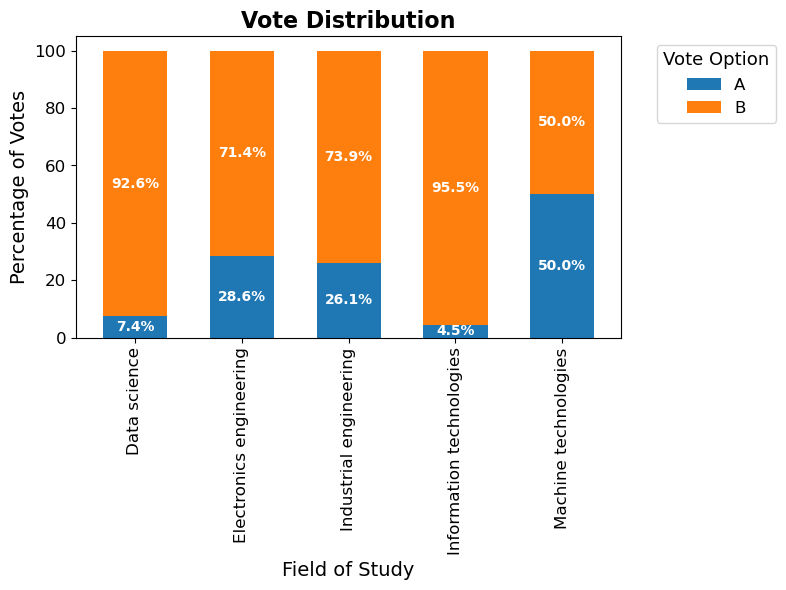

In [12]:
# Filter out votes that are not 'A' or 'B'
df_filtered = df[df['vote'].isin(['A', 'B'])]

# Create a pivot table counting votes for 'A' or 'B' in each field of study
pivot_table = df_filtered.pivot_table(index='study', columns='vote', aggfunc='size', fill_value=0)

# Convert counts to percentages
pivot_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

pivot_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.6, ax=ax)

# Adding titles and labels with enhanced formatting
ax.set_title('Vote Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Field of Study', fontsize=14)
ax.set_ylabel('Percentage of Votes', fontsize=14)

# Customizing ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Customizing the legend
ax.legend(title='Vote Option', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding percentage annotations on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:
        x, y = p.get_xy() 
        ax.text(x + width/2, 
                y + height/2, 
                f'{height:.1f}%', 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=10, 
                color='white',
                fontweight='bold')

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


## Evaluation of the A/B-test

We will perform an A/B test using the Z-test `proportions_ztest` from the package `statsmodels`. We will find out, if the job description `B` is significantly better than job description `A` with respect to the number of total votes.

In [13]:
# Filter to only include votes for "A" or "B"
df_filtered = df[df['vote'].isin(['A', 'B'])]

# Count the number of votes for each option
vote_counts = df_filtered['vote'].value_counts()

print(vote_counts)

# Number of successes (votes for "B") and trials (total votes for "A" and "B")
n_successes = vote_counts.get('B', 0)
n_trials = vote_counts.sum()

# The number of successes and trials in each group
# Group 1 (control): votes for "A"
# Group 2 (treatment): votes for "B"
count = np.array([vote_counts.get('A', 0), n_successes])
nobs = np.array([n_trials, n_trials])

# Perform the two-proportion z-test
stat, pval = proportions_ztest(count, nobs)

# Print the result
print(f'\nZ-statistic: {stat}, P-value: {pval}, \n')

# Interpretation
if pval < 0.05:
    print("The difference in vote proportions between the two groups is statistically significant.")
else:
    print("The difference in vote proportions between the two groups is not statistically significant.")

vote
B    78
A    21
Name: count, dtype: int64

Z-statistic: -8.101627221513194, P-value: 5.422889490379045e-16, 

The difference in vote proportions between the two groups is statistically significant.


### Interpretation of the results

**Z-statistic**

The Z-statistic represents the distance between the observed difference in proportions and the null hypothesis value (typically, the null hypothesis states that there is no difference between the two proportions), expressed in the number of standard deviations. A Z-statistic of 0 indicates that the observed difference is exactly the same as the null hypothesis value.

**p-value**

The p-value helps us determine whether the observed differences are statistically significant. It represents the probability of obtaining test results at least as extreme as the ones observed during the test, assuming that the null hypothesis is true. In the context of an A/B test, a p-value less than 0.05 (common threshold) suggests that there is a statistically significant difference in preferences between the two versions tested, leading us to reject the null hypothesis (meaning the second job description is better).


## Additional remarks

The A/B test could be run multiple times with the same personas. Therewith, vote distributions of each persona could be identified.